In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [3]:
#Read into the Coca Cola csv file
df = pd.read_csv('KO.csv', parse_dates = ['Date'])
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     1962-01-02   0.263021   0.270182   0.263021   0.263021   0.048145   
1     1962-01-03   0.259115   0.259115   0.253255   0.257161   0.047072   
2     1962-01-04   0.257813   0.261068   0.257813   0.259115   0.047430   
3     1962-01-05   0.259115   0.262370   0.252604   0.253255   0.046357   
4     1962-01-08   0.251302   0.251302   0.245768   0.250651   0.045881   
...          ...        ...        ...        ...        ...        ...   
15584 2023-11-29  58.580002  58.669998  58.099998  58.230000  57.770000   
15585 2023-11-30  57.959999  58.459999  57.599998  58.439999  58.439999   
15586 2023-12-01  58.270000  58.689999  58.240002  58.639999  58.639999   
15587 2023-12-04  58.590000  58.959999  58.439999  58.570000  58.570000   
15588 2023-12-05  58.549999  58.830002  58.419998  58.660000  58.660000   

         Volume  
0        806400  
1       1574400  
2        844800  
3       1420800  
4       2

In [4]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

            Date      Close  Adj Close
13342 2015-01-02  42.139999  31.598597
13343 2015-01-05  42.139999  31.598597
13344 2015-01-06  42.459999  31.838530
13345 2015-01-07  42.990002  32.235947
13346 2015-01-08  43.509998  32.625874
...          ...        ...        ...
14595 2019-12-24  54.709999  48.285961
14596 2019-12-26  55.020000  48.559566
14597 2019-12-27  55.349998  48.850811
14598 2019-12-30  55.270000  48.780209
14599 2019-12-31  55.349998  48.850811

[1258 rows x 3 columns]


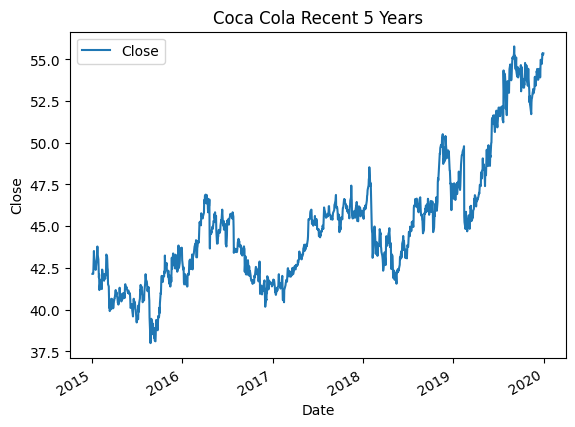

In [5]:
#Plot the trimmed data
df_trim.plot(title= 'Coca Cola Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('Coca Cola 5Years.png')
plt.show()

In [6]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

            Date      Close  Adj Close  Daily Percent Change
13342 2015-01-02  42.139999  31.598597             -0.001895
13343 2015-01-05  42.139999  31.598597              0.000000
13344 2015-01-06  42.459999  31.838530              0.007594
13345 2015-01-07  42.990002  32.235947              0.012482
13346 2015-01-08  43.509998  32.625874              0.012096
...          ...        ...        ...                   ...
14595 2019-12-24  54.709999  48.285961             -0.003642
14596 2019-12-26  55.020000  48.559566              0.005666
14597 2019-12-27  55.349998  48.850811              0.005998
14598 2019-12-30  55.270000  48.780209             -0.001445
14599 2019-12-31  55.349998  48.850811              0.001447

[1258 rows x 4 columns]


In [7]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

            Date      Close  Adj Close  Daily Percent Change  Quarter
13342 2015-01-02  42.139999  31.598597             -0.001895        1
13343 2015-01-05  42.139999  31.598597              0.000000        1
13344 2015-01-06  42.459999  31.838530              0.007594        1
13345 2015-01-07  42.990002  32.235947              0.012482        1
13346 2015-01-08  43.509998  32.625874              0.012096        1
...          ...        ...        ...                   ...      ...
14404 2019-03-25  46.029999  39.721203              0.002177        1
14405 2019-03-26  46.639999  40.247593              0.013252        1
14406 2019-03-27  46.610001  40.221718             -0.000643        1
14407 2019-03-28  46.580002  40.195820             -0.000644        1
14408 2019-03-29  46.860001  40.437439              0.006011        1

[306 rows x 5 columns]
            Date      Close  Adj Close  Daily Percent Change  Quarter
13403 2015-04-01  40.680000  30.756924              0.003206      

In [8]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.706617806155054


In [9]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.9051549591648707
0.9704132054862455
0.822380299710703


In [10]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                      0.000034                         0.706618
2   Quarter 2                      0.000322                         0.905155
3   Quarter 3                      0.000277                         0.970413
4   Quarter 4                      0.000383                         0.822380
5     Overall                      0.000256                              NaN


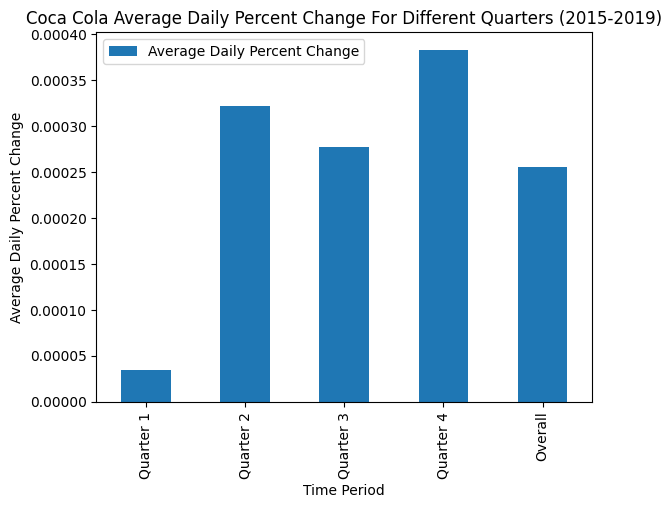

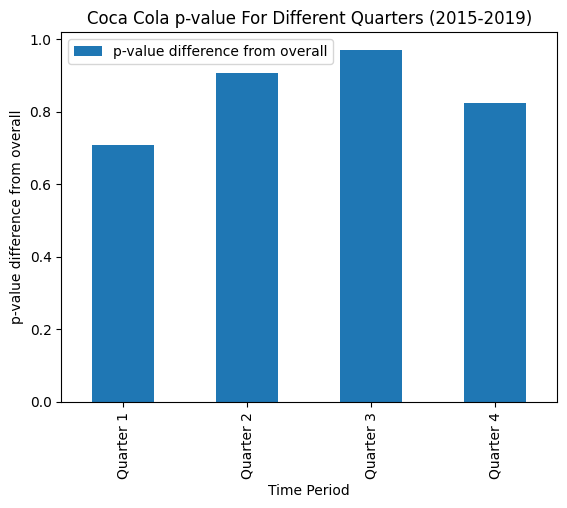

In [11]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'Coca Cola Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('Coca Cola AverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'Coca Cola p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('Coca Cola P-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

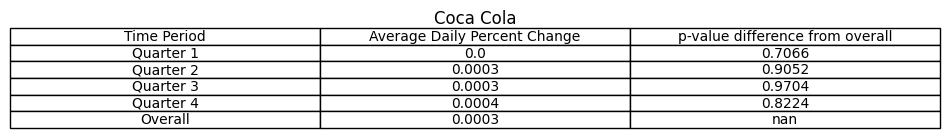

In [12]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('Coca Cola')
plt.axis('off')
plt.savefig('Coca Cola Table.png', bbox_inches = "tight")
plt.show()